# News Clustering

This notebook demonstrates how to cluster documents using Word2Vec. Word2Vec is one of the popular methods in language modeling and feature learning techniques in natural language processing (NLP). This method is used to create word embeddings in machine learning whenever we need vector representation of data.

For example in data clustering algorithms instead of bag of words (BOW) model we can use Word2Vec. The advantage of using Word2Vec is that it can capture the distance between individual words.

The example in this post will demonstrate how to use results of Word2Vec word embeddings in clustering algorithms. For this, Word2Vec model will be feeded into several K means clustering algorithms from NLTK and Scikit-learn libraries.

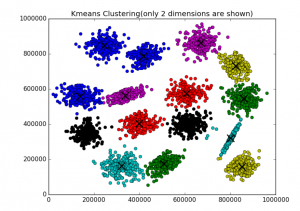

## Setup
It is possilbe to execute `pip install` directly inside Jupyter notebook

In [1]:
pip install gensim nltk sklearn tensorflow_hub

     |████████████████████████████████| 24.2MB 3.1MB/s eta 0:00:01
     |████████████████████████████████| 3.1MB 24.5MB/s eta 0:00:01
     |████████████████████████████████| 81kB 28.6MB/s eta 0:00:01
     |████████████████████████████████| 61kB 26.1MB/s eta 0:00:01
     |████████████████████████████████| 1.4MB 31.9MB/s eta 0:00:01
     |████████████████████████████████| 133kB 41.1MB/s eta 0:00:01
     |████████████████████████████████| 5.4MB 30.3MB/s eta 0:00:01
     |████████████████████████████████| 71kB 29.0MB/s eta 0:00:01
     |████████████████████████████████| 552kB 46.5MB/s eta 0:00:01
  Stored in directory: /home/jovyan/.cache/pip/wheels/97/8a/10/d646015f33c525688e91986c4544c68019b19a473cb33d3b55
  Stored in directory: /home/jovyan/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
  Stored in directory: /home/jovyan/.cache/pip/wheels/b8/cb/43/c0ba52baf2b0e371ec1d5b2d4685d6d24617b1391f3eeacda5
Successfully built nltk sklearn smart-open
Note: you may n

## Word Level Clustering

### Word2Vec
Using word2vec from python library [gensim](https://www.pydoc.io/pypi/gensim-3.2.0/autoapi/models/word2vec/index.html) is simple and easy to use. Here we just look at basic example. For the input we use the sequence of sentences hard-coded in the script.

In [2]:
from gensim.models import Word2Vec
sentences = [['this', 'is', 'the', 'good', 'machine', 'learning', 'book'],
            ['this', 'is',  'another', 'book'],
            ['one', 'more', 'book'],
            ['this', 'is', 'the', 'new', 'post'],
            ['this', 'is', 'about', 'machine', 'learning', 'post'],  
            ['and', 'this', 'is', 'the', 'last', 'post']]

model = Word2Vec(sentences, min_count=1)

Now we have model with words embedded. We can query model for similar words like below or ask to represent word as vector:

In [3]:
# Cosine similarity ranges from -1 to 1
print(model.similarity('this', 'is')) 
print(model.similarity('post', 'book'))

# Select the top2 words with the highest similarities
print(model.most_similar(positive=['machine'], topn=2))

# Get the word embedding of 'the'
print(model['the'])

0.06709367
0.08980804
[('good', 0.1996699422597885), ('new', 0.11024484038352966)]
[ 2.53352639e-03 -3.25096771e-04 -3.06366174e-03 -1.64363987e-03
  2.04668089e-04 -1.57004292e-03 -1.36835279e-03 -4.66198847e-03
 -4.82716644e-03  4.82308306e-03 -3.14510125e-03  3.44466954e-03
 -4.37487708e-03 -2.02931857e-04 -4.10684058e-03 -1.51831075e-03
  1.64155592e-03  8.35673651e-04  4.16822778e-03  1.89011931e-04
  3.11421882e-03 -1.83863030e-03 -3.06343008e-03  1.02829341e-04
  1.11642665e-04 -1.36591331e-03 -2.31448631e-03 -3.83563369e-04
 -2.64172070e-03 -1.75974669e-03  3.26380273e-03  1.77273317e-03
  2.73742829e-03 -4.78200527e-04 -1.54893519e-03  1.40303548e-03
  3.02070938e-03  3.65218567e-03  3.80810560e-03 -5.22548857e-04
  1.32545992e-03 -3.39791062e-03  1.52380334e-03  3.39999353e-03
  3.79378139e-03  4.38626535e-04 -3.62254912e-03  2.97491392e-03
  3.82308557e-04  1.17446831e-03 -2.55826837e-03 -3.33519303e-03
  4.50268417e-04 -1.51199580e-03  6.58559438e-04  3.17717833e-03
  2.430

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


Now we will feed word embeddings into clustering algorithm such as k Means which is one of the most popular unsupervised learning algorithms for finding interesting segments in the data. 

### KMeans Clustering with NLTK

In [4]:
# model.wv contains the mapping between words and embeddings.
X = model[model.wv.vocab]

print(X)

from nltk.cluster import KMeansClusterer
import nltk

NUM_CLUSTERS=3

kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)

print (assigned_clusters)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


[[-4.3891110e-03 -4.7856346e-03  3.1095352e-03 ...  3.8891765e-03
  -4.3589938e-03  1.0208384e-03]
 [-2.1603652e-03  7.5942790e-04 -3.5441110e-03 ... -1.8211267e-03
   1.6932354e-04 -1.0329536e-03]
 [ 2.5335264e-03 -3.2509677e-04 -3.0636617e-03 ... -2.9568269e-03
  -5.2301591e-05 -3.9730296e-03]
 ...
 [-3.6453907e-03  1.8585413e-03 -1.9505658e-03 ... -1.1449869e-03
  -4.0542153e-03 -4.5292708e-03]
 [ 1.3278276e-03  3.9907941e-03 -4.5276710e-04 ...  7.5003505e-04
  -4.9574929e-03 -1.7417581e-03]
 [ 3.6664321e-03 -3.7548546e-04 -1.9791331e-03 ... -1.9200057e-03
  -4.9129301e-03  4.5093796e-03]]
[2, 2, 1, 1, 1, 0, 0, 1, 0, 0, 2, 0, 1, 1, 2]


There are several options for the distance as below:

`nltk.cluster.util.cosine_distance(u, v)`

Returns 1 minus the cosine of the angle between vectors v and u. This is equal to 1 – (u.v / |u||v|).

`nltk.cluster.util.euclidean_distance(u, v)`

Returns the euclidean distance between vectors u and v. This is equivalent to the length of the vector (u – v).


After we got cluster results we can associate each word with the cluster that it got assigned to

In [5]:
words = list(model.wv.vocab)
for i, word in enumerate(words):  
    print (word + ":" + str(assigned_clusters[i]))

this:2
is:2
the:1
good:1
machine:1
learning:0
book:0
another:1
one:0
more:0
new:2
post:0
about:1
and:1
last:2


### KMeans Clustering with Scikit-learn
Sklearn is also a popular library for clustering:

In [6]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)
 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
 
print ("Cluster id labels for the input")
print (labels)
print ("Centroids data")
print (centroids)
 

Cluster id labels for the input
[2 0 0 0 0 1 1 2 2 2 0 0 1 0 2]
Centroids data
[[-8.2034664e-04 -3.7658188e-04 -2.2095572e-03 -4.4603198e-04
   6.6126813e-05 -2.0942430e-03 -8.6953922e-05 -1.0039186e-03
  -1.4261223e-03  3.2169395e-03 -2.8860077e-04  1.5608714e-03
  -1.0490102e-03 -1.6250389e-03  4.0947480e-04  1.5173996e-03
  -3.9863837e-05 -7.3194026e-04 -2.3296333e-04 -5.8556872e-04
  -7.0443930e-04  1.3248550e-03  9.1369578e-04  2.3081526e-04
  -1.7891584e-03 -9.9970412e-04  2.3415764e-03  1.0567196e-03
  -5.9222395e-05 -4.9423182e-04  1.6128441e-05  2.2112397e-03
   3.0389728e-04  7.6546211e-04 -2.7770386e-03 -6.1863929e-04
   1.9955321e-04  1.3400348e-03  2.2246914e-03 -4.4471890e-04
   1.7012206e-03  1.0099695e-03  3.2310671e-04  1.7755265e-05
   1.3946188e-03 -2.2893271e-04  3.2973418e-05 -1.2264472e-03
   8.8421552e-04 -4.8372336e-04 -1.7658069e-03 -2.3660061e-05
  -5.7054375e-04 -2.6165165e-03 -5.6018750e-04  1.3061969e-03
   1.8423737e-03 -6.6617643e-04  7.6520734e-04  1.766

## Sentence / Paragraph Level Clustering

### Sentence Embedding
Sentence embedding is similar to word embedding with one extra step - combining word embeddings.

There are three common ways to combine word embeddings:
* Mean - the weighted sum divided by the total weig
* Sqrtn - the weighted sum divided by the square root of the sum of the squares of the weights
* Sum - the weighted sum of the embedding results for each row

We will use `Mean` for this demo:

For each sentence from the set of sentences, word embedding of each word is summed and in the end divided by number of words in the sentence. So we are getting average of all word embeddings for each sentence and use them as we would use embeddings at word level – feeding to machine learning clustering algorithm such k-means.


In [7]:
def sentence_vectorizer(sentence, model):
    sentence_vec =[]
    num_word = 0
    for word in sentence:
        try:
            if num_word == 0:
                sentence_vec = model[word]
            else:
                sentence_vec = np.add(sentence_vec, model[word])
            num_word += 1
        except:
            pass
     
    return np.asarray(sentence_vec) / num_word

## Pre-trained Word Embeddings
Sometimes we don't have enough data for customized training. We can use pre-trained model for general use case.

[Tensorflow Hub](https://www.tensorflow.org/hub/) is a great resource for word embedding models. 

We can just use pre-trained Word2Vec model from Tensorflow Hub: https://tfhub.dev/google/Wiki-words-500-with-normalization/1. Please read details about the model such as Dataset, Network, Combiner etc.

In [41]:
import tensorflow_hub as hub
import tensorflow as tf
import numpy as np

embed = hub.Module("https://tfhub.dev/google/Wiki-words-500-with-normalization/1")
messages = ["cat is on the mat", "dog is in the fog"]

with tf.Session() as session:
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])
    message_embeddings = session.run(embed(messages))

    for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):
        print("Message: {}".format(messages[i]))
        print("Embedding size: {}".format(len(message_embedding)))
        message_embedding_snippet = ", ".join(
            (str(x) for x in message_embedding[:3]))
        print("Embedding: [{}, ...]\n".format(message_embedding_snippet))


Message: cat is on the mat
Embedding size: 500
Embedding: [-0.006868585012853146, -0.03764241188764572, 0.046240050345659256, ...]

Message: dog is in the fog
Embedding size: 500
Embedding: [0.023374248296022415, -0.018597854301333427, 0.04899324104189873, ...]



## Apply Pre-trained Embedding to News

It is the time to try pre-trained embedding to our real data. Please note, pre-trained embedding is slow for large amount of data. A distributed comupting system is usually required for such kind of job. We will just use some news for demo.

In [39]:
import pandas as pd

df = pd.read_csv("labeled_news.csv", header=None)

descriptions = df[2].tolist()[0:10]  # news description

# Convert to lower case
descriptions = [x.lower() for x in descriptions]

print(descriptions)

['president donald trump told israeli prime minister benjamin netanyahu wednesday that the us is going to push for a peace deal with the palestinians and asked israel "to hold back" on settlement construction.', 'president donald trump and israeli prime minister benjamin netanyahu hold a joint press conference at the white house.', '"tomorrow\'s world will be different -- and it is very near." those were the words of israeli prime minister benjamin netanyahu as he dismissed last month\'s mideast peace conference in paris as "useless," instead focusing on the inauguration of us president donald trump just days later.', 'president donald trump told israeli newspaper israel hayom, that he is "not somebody that believes that going forward with ... settlements is a good thing for peace," in an interview billed as his first with israeli media since taking office.', "president trump hosts world leaders. michael flynn has resigned. there will be high-stakes cabinet votes and more executive act

In [44]:
# For the news, run embedding.

descriptions_embeddings = []

with tf.Session() as session:
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])
    descriptions_embeddings = session.run(embed(descriptions))

    for i, descriptions_embedding in enumerate(np.array(descriptions_embeddings).tolist()):
        print("Descriptions: {}".format(descriptions[i]))
        print("Embedding size: {}".format(len(descriptions_embedding)))
        descriptions_embedding_snippet = ", ".join(
            (str(x) for x in descriptions_embedding[:3]))
        print("Embedding: [{}, ...]\n".format(descriptions_embedding_snippet))

Descriptions: president donald trump told israeli prime minister benjamin netanyahu wednesday that the us is going to push for a peace deal with the palestinians and asked israel "to hold back" on settlement construction.
Embedding size: 500
Embedding: [-0.07094813883304596, 0.04846483841538429, 0.22838802635669708, ...]

Descriptions: president donald trump and israeli prime minister benjamin netanyahu hold a joint press conference at the white house.
Embedding size: 500
Embedding: [-0.02619084157049656, 0.014496088027954102, 0.10218337923288345, ...]

Descriptions: "tomorrow's world will be different -- and it is very near." those were the words of israeli prime minister benjamin netanyahu as he dismissed last month's mideast peace conference in paris as "useless," instead focusing on the inauguration of us president donald trump just days later.
Embedding size: 500
Embedding: [-0.05737926438450813, 0.015625081956386566, 0.20706059038639069, ...]

Descriptions: president donald trump

In [47]:
print("Number of news: {}".format(len(descriptions_embeddings)))
print("Embedding size: {}".format(len(descriptions_embeddings[0])))

Number of news: 10
Embedding size: 500


In [55]:
source = descriptions_embeddings[0]

for i, target in enumerate(descriptions_embeddings[1:]):
    similarity = np.inner(source, target)
    print("Similarity of 0 with {}: {}".format(i + 1, similarity))

Similarity of 0 with 1: 4.009627819061279
Similarity of 0 with 2: 7.84098482131958
Similarity of 0 with 3: 7.444583415985107
Similarity of 0 with 4: 5.216556072235107
Similarity of 0 with 5: 11.070091247558594
Similarity of 0 with 6: 3.202732563018799
Similarity of 0 with 7: 6.463898658752441
Similarity of 0 with 8: 7.124373912811279
Similarity of 0 with 9: 5.502941608428955
